In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Mlxtend - Machine learning extensions.

In [5]:
# Read the data
trans = pd.read_csv("Transactions.csv",header=None)
trans.head()

,0,1
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [6]:
trans.columns = ['Id','Items']

In [7]:
trans.head()

,Id,Items
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


In [8]:
basket1 = pd.crosstab(trans.Id,trans.Items).astype('bool').astype('int')

In [12]:
basket1.head()
basket1.columns.name=None
basket1.index.name=None
basket1


,Choclates,Coke,Cookies,Eraser,Marker,Pencil
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1
1010,0,1,0,0,1,0


In [14]:
#This data, if we observe, is in the melt form and we need to get all items for transactions in a row i.e
# for one trannsaction we need to have only one row
#basket= trans.groupby(['Id','Items'])['Items'].sum().unstack().reset_index().fillna(0).set_index('Id')
#basket[basket !=0]=1
#basket 
# The above logic is same as Crosstab.

Items,Choclates,Coke,Cookies,Eraser,Marker,Pencil
Id,,,,,,
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1


In [16]:
frequent_items = apriori(basket1,min_support=0.07,use_colnames=True)
print(frequent_items)

    support                      itemsets
0       0.5                   (Choclates)
1       0.2                        (Coke)
2       0.2                     (Cookies)
3       0.1                      (Eraser)
4       0.5                      (Marker)
5       0.8                      (Pencil)
6       0.2          (Choclates, Cookies)
7       0.1           (Marker, Choclates)
8       0.5           (Choclates, Pencil)
9       0.1                (Coke, Eraser)
10      0.1                (Marker, Coke)
11      0.1                (Coke, Pencil)
12      0.2             (Pencil, Cookies)
13      0.1              (Eraser, Pencil)
14      0.3              (Marker, Pencil)
15      0.2  (Choclates, Pencil, Cookies)
16      0.1   (Marker, Choclates, Pencil)
17      0.1        (Coke, Eraser, Pencil)


In [18]:
rules = association_rules(frequent_items,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333
1,(Cookies),(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333
4,(Coke),(Eraser),0.2,0.1,0.1,0.500,5.00,0.08,1.800000


In [ ]:
# leverage is: difference betweeb frequency of item A and B together and expected freq of A and B if they are independent.# support(A=>B)-support(A)*support(B) 
# Range of values [0,1]. If 0 then A and B are independent

# conviction: 1-support(B)/1-confidence(A=>B)
# Range of values [0,inf]. Close to 0 or low conviction values imply low degree of association; and higher values imply dependency (Association)

In [22]:
rules[(rules['lift'] >= 1.5) &
       (rules['confidence'] >= 0.8) &
       (rules['support'] <0.2)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Eraser),(Coke),0.1,0.2,0.1,1.0,5.0,0.08,inf
21,"(Coke, Pencil)",(Eraser),0.1,0.1,0.1,1.0,10.0,0.09,inf
22,"(Eraser, Pencil)",(Coke),0.1,0.2,0.1,1.0,5.0,0.08,inf
24,(Eraser),"(Coke, Pencil)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [24]:
support = rules.as_matrix(columns = ['support'])
confidence = rules.as_matrix(columns = ['confidence'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [25]:
print(support)
print("\n")
print(confidence)

[[0.2]
 [0.2]
 [0.5]
 [0.5]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]


[[0.4  ]
 [1.   ]
 [1.   ]
 [0.625]
 [0.5  ]
 [1.   ]
 [0.2  ]
 [0.5  ]
 [0.25 ]
 [1.   ]
 [1.   ]
 [0.125]
 [0.4  ]
 [1.   ]
 [1.   ]
 [0.4  ]
 [0.25 ]
 [1.   ]
 [1.   ]
 [0.125]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.5  ]
 [1.   ]
 [0.125]]


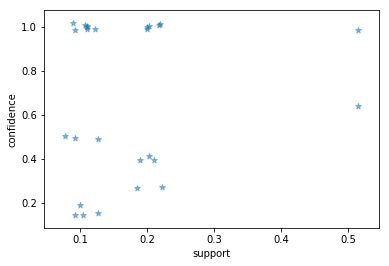

In [30]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10)-5)
    confidence[i] = confidence[i] + 0.0025 *(random.randint(1,10)-5)
plt.scatter(support, confidence, alpha = 0.5, marker = "*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [31]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333
1,(Cookies),(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333
4,(Coke),(Eraser),0.2,0.1,0.1,0.500,5.00,0.08,1.800000
5,(Eraser),(Coke),0.1,0.2,0.1,1.000,5.00,0.08,inf
6,(Marker),(Coke),0.5,0.2,0.1,0.200,1.00,0.00,1.000000
7,(Coke),(Marker),0.2,0.5,0.1,0.500,1.00,0.00,1.000000
8,(Pencil),(Cookies),0.8,0.2,0.2,0.250,1.25,0.04,1.066667
9,(Cookies),(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf


In [32]:
rules = rules.values

In [33]:
rules

array([[frozenset({'Choclates'}), frozenset({'Cookies'}), 0.5, 0.2, 0.2,
        0.4, 2.0, 0.1, 1.3333333333333335],
       [frozenset({'Cookies'}), frozenset({'Choclates'}), 0.2, 0.5, 0.2,
        1.0, 2.0, 0.1, inf],
       [frozenset({'Choclates'}), frozenset({'Pencil'}), 0.5, 0.8, 0.5,
        1.0, 1.25, 0.09999999999999998, inf],
       [frozenset({'Pencil'}), frozenset({'Choclates'}), 0.8, 0.5, 0.5,
        0.625, 1.25, 0.09999999999999998, 1.3333333333333333],
       [frozenset({'Coke'}), frozenset({'Eraser'}), 0.2, 0.1, 0.1, 0.5,
        5.0, 0.08, 1.8],
       [frozenset({'Eraser'}), frozenset({'Coke'}), 0.1, 0.2, 0.1, 1.0,
        5.0, 0.08, inf],
       [frozenset({'Marker'}), frozenset({'Coke'}), 0.5, 0.2, 0.1, 0.2,
        1.0, 0.0, 1.0],
       [frozenset({'Coke'}), frozenset({'Marker'}), 0.2, 0.5, 0.1, 0.5,
        1.0, 0.0, 1.0],
       [frozenset({'Pencil'}), frozenset({'Cookies'}), 0.8, 0.2, 0.2,
        0.25, 1.25, 0.03999999999999998, 1.0666666666666667],
       [fr

In [62]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules[i,0]:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules[i,1]:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    

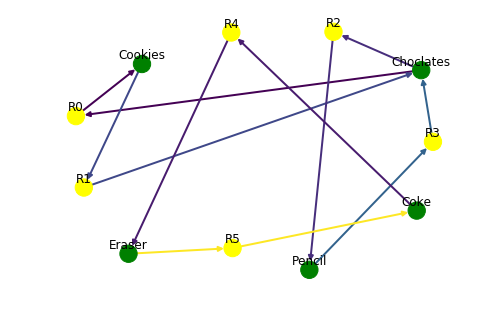

In [63]:
draw_graph (rules, 6)

In [ ]:
#Given to you is a Titanic dataset. You need to identify the rules for survival
# Given to you is a transactions data, bring out the associations using apriori algorithm

In [76]:
tdata=pd.read_csv("titanic_data.csv")
tdata.head()

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [77]:
Y = pd.get_dummies(data = tdata,columns=["Class","Sex","Age","Survived"])
Y.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [78]:
#Y['ID']=Y.index
Y.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [79]:
Y[Y['Survived_Yes']==1]

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
1490,1,0,0,0,0,1,0,1,0,1
1491,1,0,0,0,0,1,0,1,0,1
1492,1,0,0,0,0,1,0,1,0,1
1493,1,0,0,0,0,1,0,1,0,1
1494,1,0,0,0,0,1,0,1,0,1
1495,0,1,0,0,0,1,0,1,0,1
1496,0,1,0,0,0,1,0,1,0,1
1497,0,1,0,0,0,1,0,1,0,1
1498,0,1,0,0,0,1,0,1,0,1
1499,0,1,0,0,0,1,0,1,0,1


In [80]:
items = apriori(Y, min_support=0.07, use_colnames=True)
rules = association_rules(items,metric="lift",min_threshold=1)

In [81]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
2,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,0.044531,1.803390
3,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,0.044531,1.192940
4,(Sex_Female),(Class_3rd),0.213539,0.320763,0.089050,0.417021,1.300090,0.020555,1.165114


In [84]:
rules.values

array([[frozenset({'Class_1st'}), frozenset({'Age_Adult'}),
        0.14766015447523853, 0.9504770558836892, 0.1449341208541572,
        0.9815384615384615, 1.032679805853802, 0.004586531957201712,
        2.682492806300156],
       [frozenset({'Age_Adult'}), frozenset({'Class_1st'}),
        0.9504770558836892, 0.14766015447523853, 0.1449341208541572,
        0.15248565965583172, 1.0326798058538018, 0.004586531957201712,
        1.005693715080542],
       [frozenset({'Class_1st'}), frozenset({'Survived_Yes'}),
        0.14766015447523853, 0.3230349840981372, 0.09223080417991822,
        0.6246153846153846, 1.933584334090663, 0.04453140852708106,
        1.8033904112139785],
       [frozenset({'Survived_Yes'}), frozenset({'Class_1st'}),
        0.3230349840981372, 0.14766015447523853, 0.09223080417991822,
        0.28551336146272854, 1.933584334090663, 0.04453140852708106,
        1.1929402168663492],
       [frozenset({'Sex_Female'}), frozenset({'Class_3rd'}),
        0.21353930031803

In [87]:
x =rules[rules['consequents'] == frozenset({"Survived_Yes"})]

In [88]:
x

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,0.044531,1.803390
14,(Sex_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
25,"(Class_1st, Age_Adult)",(Survived_Yes),0.144934,0.323035,0.089505,0.617555,1.911727,0.042686,1.770097
68,"(Sex_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
